In [1]:
# Подключение необходимых модулей
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

In [2]:
!wget -O "weather.xls.gz" "http://93.90.217.251/download/files.synop/27/27612.01.01.2016.03.11.2021.1.0.0.ru.utf8.00000000.xls.gz"
!gzip -df "weather.xls.gz"

--2021-11-03 14:33:35--  http://93.90.217.251/download/files.synop/27/27612.01.01.2016.03.11.2021.1.0.0.ru.utf8.00000000.xls.gz
Connecting to 93.90.217.251:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1412905 (1.3M) [application/octet-stream]
Saving to: ‘weather.xls.gz’

weather.xls.gz      100%[===================>]   1.35M   331KB/s    in 4.2s    

2021-11-03 14:33:40 (331 KB/s) - ‘weather.xls.gz’ saved [1412905/1412905]



In [33]:
# Считываем данные в DataFrame data
data = pd.read_excel('weather.xls',skiprows=6)
# Отбрасываем строки с пропуском по температуре
data = data[data['T'].notna()]
# Преобразуем даты
data['dates'] = pd.to_datetime(data['Местное время в Москве (ВДНХ)'],dayfirst=True)
data

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,dates
0,03.11.2021 09:00,4.1,752.1,766.0,0.0,97.0,"Ветер, дующий с юго-востока",2,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,1.9,NaN,Слоистые туманообразные или слоистые разорванн...,100%.,100-200,NaN,NaN,3.9,3.6,Осадков нет,12.0,NaN,NaN,NaN,NaN,2021-11-03 09:00:00
1,03.11.2021 06:00,3.4,752.1,766.0,-0.5,97.0,"Ветер, дующий с востоко-юго-востока",2,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,1.9,NaN,Слоистые туманообразные или слоистые разорванн...,100%.,100-200,NaN,NaN,4,3.0,Осадков нет,12.0,NaN,NaN,NaN,NaN,2021-11-03 06:00:00
2,03.11.2021 03:00,2.8,752.6,766.6,-0.3,97.0,"Ветер, дующий с востоко-юго-востока",2,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые туманообразные или слоистые разорванн...,100%.,100-200,NaN,NaN,4.5,2.3,NaN,NaN,NaN,NaN,NaN,NaN,2021-11-03 03:00:00
3,03.11.2021 00:00,2.2,752.9,766.9,0.0,97.0,"Ветер, дующий с востоко-юго-востока",1,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые туманообразные или слоистые разорванн...,100%.,50-100,NaN,NaN,2.7,1.8,NaN,NaN,NaN,NaN,NaN,NaN,2021-11-03 00:00:00
4,02.11.2021 21:00,1.9,752.9,766.9,-0.2,98.0,"Ветер, дующий с востока",2,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,2.9,Слоистые туманообразные или слоистые разорванн...,100%.,100-200,NaN,NaN,3.2,1.6,Осадков нет,12.0,NaN,NaN,NaN,NaN,2021-11-02 21:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17057,01.01.2016 12:00,-15.0,763.2,779.3,0.5,73.0,"Ветер, дующий с востоко-северо-востока",1,NaN,NaN,60%.,Состояние неба в общем не изменилось.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",60%.,600-1000,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10,-18.8,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 12:00:00
17058,01.01.2016 09:00,-14.8,762.7,778.8,0.3,77.0,"Ветер, дующий с востоко-северо-востока",1,NaN,NaN,100%.,Снег непрерывный слабый в срок наблюдения.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,-14.9,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",100%.,"2500 или более, или облаков нет.",Высокослоистые непросвечивающие или слоисто-до...,NaN,10,-17.9,0.2,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,3,2016-01-01 09:00:00
17059,01.01.2016 06:00,-14.6,762.4,778.5,0.2,78.0,"Ветер, дующий с северо-востока",2,NaN,NaN,100%.,Снег неливневый.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,-14.6,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",100%.,"2500 или более, или облаков нет.",Высокослоистые непросвечивающие или слоисто-до...,NaN,NaN,-17.7,0.3,12.0,NaN,NaN,NaN,NaN,2016-01-01 06:00:00
17060,01.01.2016 03:00,-14.0,762.2,778.3,0.0,78.0,"Ветер, дующий с северо-востока",1,NaN,NaN,100%.,Снег непрерывный слабый в срок наблюдения.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",100%.,"2500 или более, или облаков нет.",Высокослоистые непросвечивающие или слоисто-до...,NaN,NaN,-17.1,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 03:00:00


In [78]:
# Преобразование даты в день в году
data['dayofyear'] = data['dates'].dt.dayofyear

In [5]:
# Разбиение датасета на обучающую и тестовую выборку
data_train = data[data.dates <'2020-01-01']
data_test = data[data.dates >='2020-01-01']

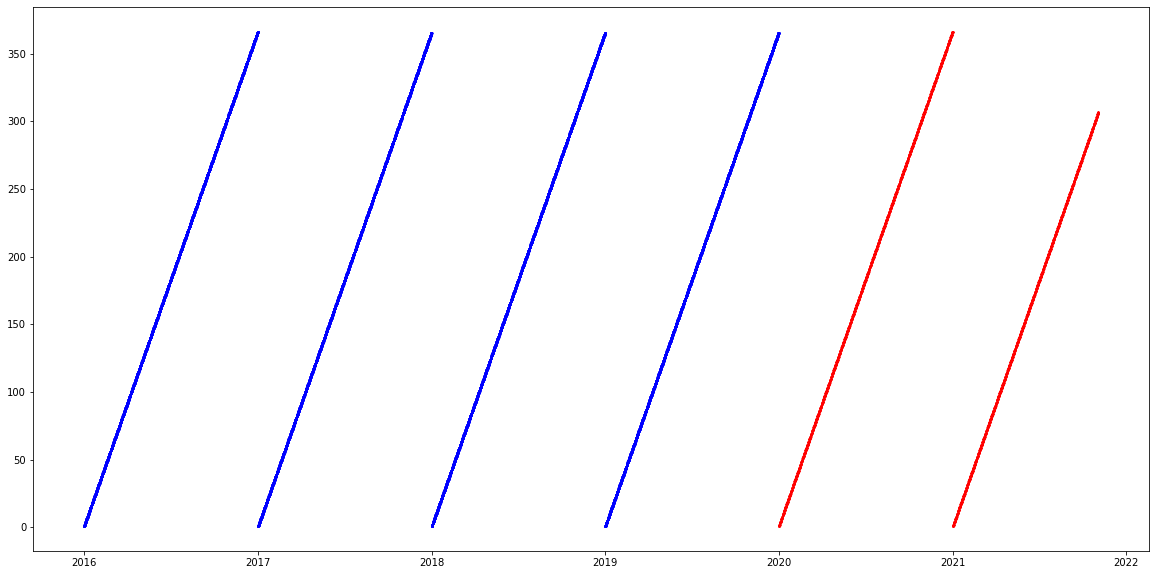

In [6]:
# Отрисовка новых признаков в тренировочной и тестовой выборках
plt.figure(figsize=(20,10))
plt.scatter(data_train['dates'],data_train['dayofyear'],c='blue',marker='.',s=10)
plt.scatter(data_test['dates'],data_test['dayofyear'],c='red',marker='.',s=5)

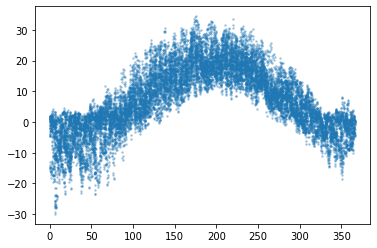

In [7]:
plt.scatter(data['dayofyear'],data['T'],alpha=0.3,s=10,marker='.')

In [8]:
# Разбиение датасетов на признаки и целевые переменные
X_train = pd.DataFrame()
X_train['dayofyear'] = data_train['dayofyear']
X_test = pd.DataFrame()
X_test['dayofyear'] = data_test['dayofyear']

y_train = data_train['T']
y_test = data_test['T']

In [9]:
# Создание модели линейной регрессии
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# Предсказания модели для тренровочной и тестовой моделей
pred_train = lin_reg.predict(X_train)
pred_test = lin_reg.predict(X_test)

In [11]:
# Вычисление ошибки модели
mean_squared_error(y_train,pred_train),mean_squared_error(y_test,pred_test)

(105.66810600668143, 100.01580739902889)

Ошибка модели на обучающих данных: 105.66810600668143
Ошибка модели на тестовых данных: 100.01580739902889


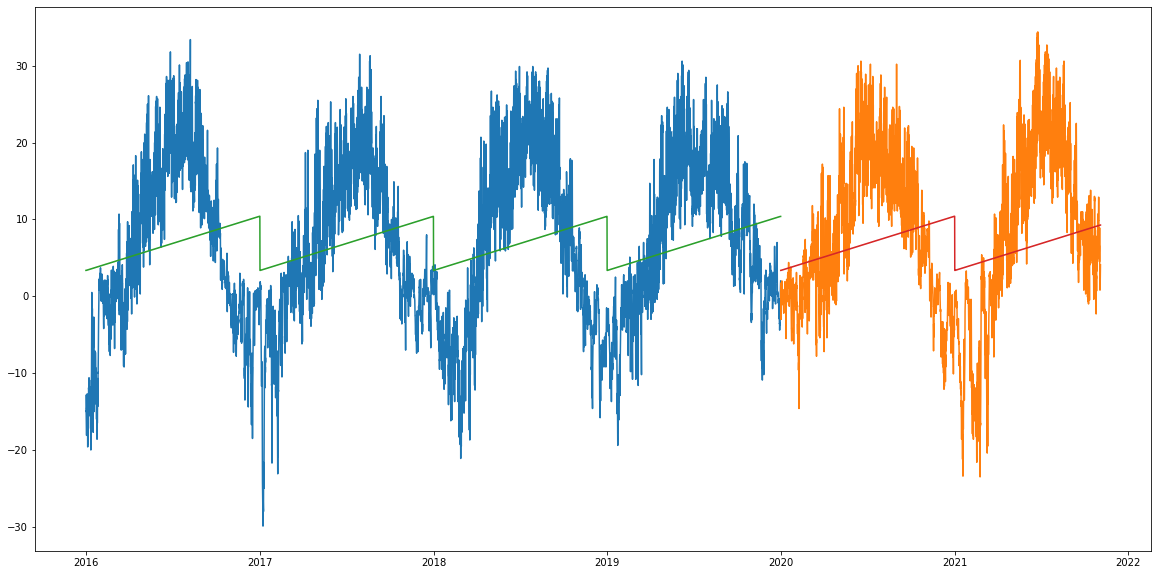

In [12]:
plt.figure(figsize=(20,10))
plt.plot(data_train['dates'],y_train)
plt.plot(data_test['dates'],y_test)
plt.plot(data_train['dates'],pred_train)
plt.plot(data_test['dates'],pred_test)

print('Ошибка модели на обучающих данных: {}'.format(mean_squared_error(y_train,pred_train)))
print('Ошибка модели на тестовых данных: {}'.format(mean_squared_error(y_test,pred_test)))


In [13]:
# Тригонометрическое преобразование признаков
data['dayofyear'].min(),data['dayofyear'].max()

(1, 366)

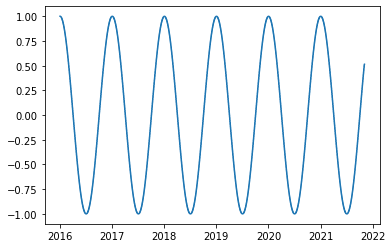

In [79]:
# Создадим новый признак 
data['cos_dayofyear'] = np.cos(((data['dayofyear'] - 1) / 366) * 2 * np.pi)
plt.plot(data['dates'],data['cos_dayofyear'])

Ошибка модели на обучающих данных: 29.40398343167642
Ошибка модели на тестовых данных: 32.42278788553416


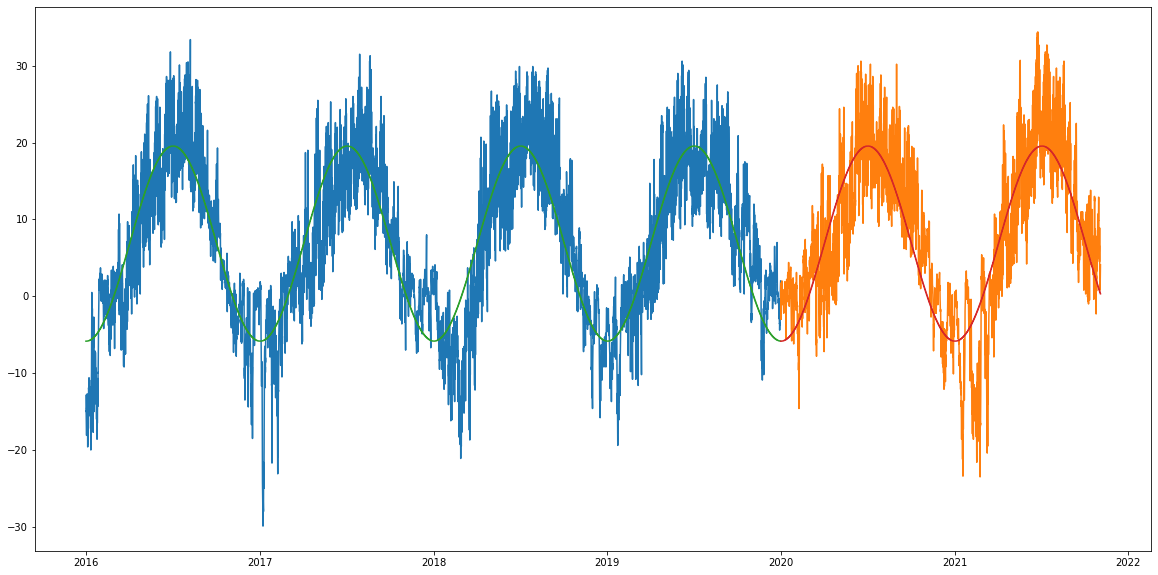

In [15]:
data_train = data[data.dates <'2020-01-01']
data_test = data[data.dates >='2020-01-01']

# Разбиение датасетов на признаки и целевые переменные
X_train = pd.DataFrame()
X_train['cos_dayofyear'] = data_train['cos_dayofyear']
X_test = pd.DataFrame()
X_test['cos_dayofyear'] = data_test['cos_dayofyear']

y_train = data_train['T']
y_test = data_test['T']

# Создание модели линейной регрессии

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

# Предсказания модели для тренровочной и тестовой моделей
pred_train = lin_reg.predict(X_train)
pred_test = lin_reg.predict(X_test)

plt.figure(figsize=(20,10))
plt.plot(data_train['dates'],y_train)
plt.plot(data_test['dates'],y_test)
plt.plot(data_train['dates'],pred_train)
plt.plot(data_test['dates'],pred_test)

print('Ошибка модели на обучающих данных: {}'.format(mean_squared_error(y_train,pred_train)))
print('Ошибка модели на тестовых данных: {}'.format(mean_squared_error(y_test,pred_test)))


In [96]:
cv  = TimeSeriesSplit() # Генератор разбиений для кросс-валидации

# Параметры,которые будем перебирать 
params = {
    'splitter':['best','random'],
    'max_depth': [None] + [i for i in range(1,21)],
    'max_leaf_nodes': [None] + [i for i in range(10,110,10)],
    'ccp_alpha': [i for i in np.arange(0.0,1.1,0.1)]
}
# Создание модели DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=1)

# Создание объекта GridSearchCv для определения улчшего набора параметров
grid_s = GridSearchCV(model,param_grid=params,scoring='neg_mean_squared_error',cv=cv,verbose=True,n_jobs=2)

In [97]:
data_train = data[data.dates <'2020-01-01']
data_test = data[data.dates >='2020-01-01']

# Разбиение датасетов на признаки и целевые переменные
X_train = pd.DataFrame()
X_train['dayofyear'] = data_train['dayofyear']
X_test = pd.DataFrame()
X_test['dayofyear'] = data_test['dayofyear']

y_train = data_train['T']
y_test = data_test['T'] 
grid_s.fit(X_train,y_train)
grid_s.best_params_

Fitting 5 folds for each of 5082 candidates, totalling 25410 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 330 tasks      | elapsed:    3.1s
[Parallel(n_jobs=2)]: Done 2730 tasks      | elapsed:   14.7s
[Parallel(n_jobs=2)]: Done 6730 tasks      | elapsed:   34.8s
[Parallel(n_jobs=2)]: Done 12330 tasks      | elapsed:  1.0min
[Parallel(n_jobs=2)]: Done 19530 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 25410 out of 25410 | elapsed:  2.1min finished


{'ccp_alpha': 0.0,
 'max_depth': None,
 'max_leaf_nodes': 30,
 'splitter': 'random'}

Ошибка модели на обучающих данных: 24.347498914601932
Ошибка модели на тестовых данных: 29.29695251183617


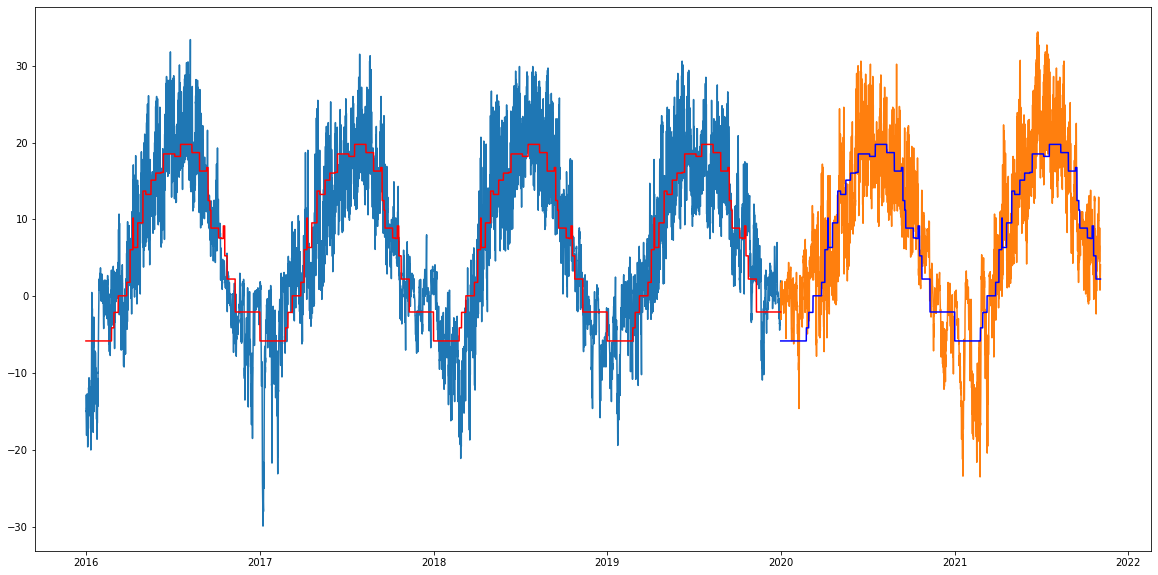

In [98]:
pred_train = grid_s.predict(X_train)
pred_test = grid_s.predict(X_test)

plt.figure(figsize=(20,10))
plt.plot(data_train['dates'],y_train)
plt.plot(data_test['dates'],y_test)
plt.plot(data_train['dates'],pred_train,color = 'red')
plt.plot(data_test['dates'],pred_test,color = 'blue')

print('Ошибка модели на обучающих данных: {}'.format(mean_squared_error(y_train,pred_train)))
print('Ошибка модели на тестовых данных: {}'.format(mean_squared_error(y_test,pred_test)))


Fitting 5 folds for each of 5082 candidates, totalling 25410 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 584 tasks      | elapsed:    3.8s
[Parallel(n_jobs=2)]: Done 5384 tasks      | elapsed:   24.7s
[Parallel(n_jobs=2)]: Done 13384 tasks      | elapsed:  1.0min
[Parallel(n_jobs=2)]: Done 24584 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 25410 out of 25410 | elapsed:  1.9min finished


Ошибка модели на обучающих данных: 30.13276078118513
Ошибка модели на тестовых данных: 34.827928003134076


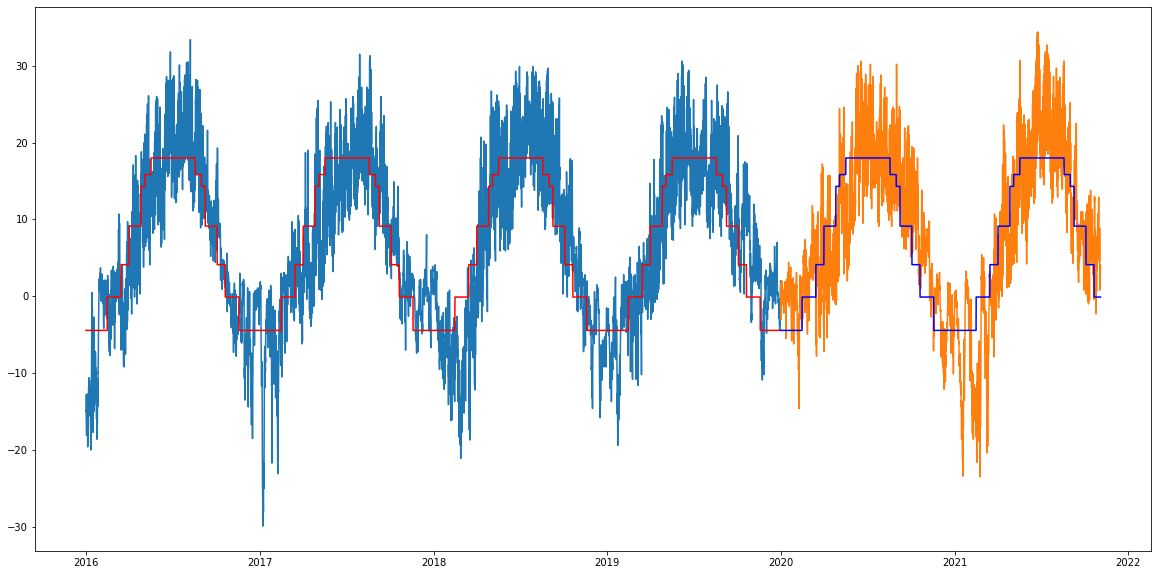

In [99]:
# DecisionTreeRegressor;тригонометрическое преобразование признаков (cos)

data_train = data[data.dates <'2020-01-01']
data_test = data[data.dates >='2020-01-01']

# Разбиение датасетов на признаки и целевые переменные
X_train = pd.DataFrame()
X_train['cos_dayofyear'] = data_train['cos_dayofyear']
X_test = pd.DataFrame()
X_test['cos_dayofyear'] = data_test['cos_dayofyear']

y_train = data_train['T']
y_test = data_test['T']

cv  = TimeSeriesSplit()
params = {
    'splitter':['best','random'],
    'max_depth': [None] + [i for i in range(1,21)],
    'max_leaf_nodes': [None] + [i for i in range(10,110,10)],
    'ccp_alpha': [i for i in np.arange(0.0,1.1,0.1)]
}
model = DecisionTreeRegressor(random_state=1)
grid_s = GridSearchCV(model,param_grid=params,scoring='neg_mean_squared_error',cv=cv,verbose=True,n_jobs=2)

grid_s.fit(X_train,y_train)

pred_train = grid_s.predict(X_train)
pred_test = grid_s.predict(X_test)

plt.figure(figsize=(20,10))
plt.plot(data_train['dates'],y_train)
plt.plot(data_test['dates'],y_test)
plt.plot(data_train['dates'],pred_train,color = 'red')
plt.plot(data_test['dates'],pred_test,color = 'blue')

print('Ошибка модели на обучающих данных: {}'.format(mean_squared_error(y_train,pred_train)))
print('Ошибка модели на тестовых данных: {}'.format(mean_squared_error(y_test,pred_test)))

Fitting 5 folds for each of 5082 candidates, totalling 25410 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 330 tasks      | elapsed:    2.9s
[Parallel(n_jobs=2)]: Done 2730 tasks      | elapsed:   13.8s
[Parallel(n_jobs=2)]: Done 6730 tasks      | elapsed:   32.6s
[Parallel(n_jobs=2)]: Done 12330 tasks      | elapsed:   58.5s
[Parallel(n_jobs=2)]: Done 19530 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done 25410 out of 25410 | elapsed:  2.0min finished


{'ccp_alpha': 0.0, 'max_depth': 1, 'max_leaf_nodes': None, 'splitter': 'random'}
Ошибка модели на обучающих данных: 107.62839438869241
Ошибка модели на тестовых данных: 103.42402798362485


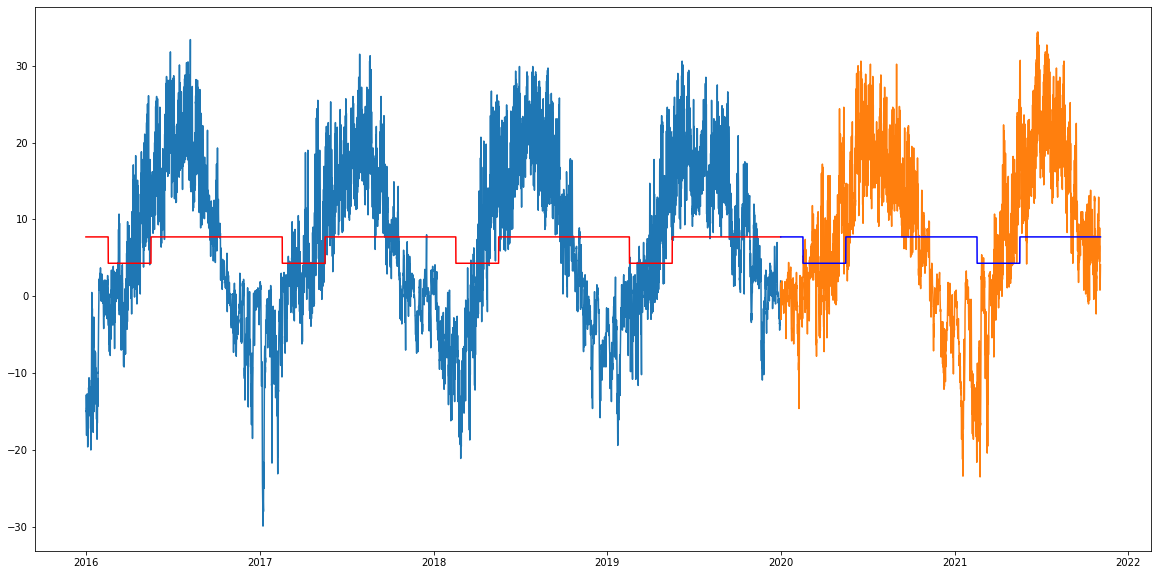

In [102]:
# DecisionTreeRegressor;тригонометрическое преобразование признаков (sin)
data['sin_dayofyear'] = np.sin(((data['dayofyear'] - 1) / 366) * 2 * np.pi)
data_train = data[data.dates <'2020-01-01']
data_test = data[data.dates >='2020-01-01']

# Разбиение датасетов на признаки и целевые переменные
X_train = pd.DataFrame()
X_train['sin_dayofyear'] = data_train['sin_dayofyear']
X_test = pd.DataFrame()
X_test['sin_dayofyear'] = data_test['sin_dayofyear']

y_train = data_train['T']
y_test = data_test['T']

cv  = TimeSeriesSplit()
params = {
    'splitter':['best','random'],
    'max_depth': [None] + [i for i in range(1,21)],
    'max_leaf_nodes': [None] + [i for i in range(10,110,10)],
    'ccp_alpha': [i for i in np.arange(0.0,1.1,0.1)]
}
model = DecisionTreeRegressor(random_state=1)
grid_s = GridSearchCV(model,param_grid=params,scoring='neg_mean_squared_error',cv=cv,verbose=True,n_jobs=2)

grid_s.fit(X_train,y_train)
print(grid_s.best_params_)
pred_train = grid_s.predict(X_train)
pred_test = grid_s.predict(X_test)

plt.figure(figsize=(20,10))
plt.plot(data_train['dates'],y_train)
plt.plot(data_test['dates'],y_test)
plt.plot(data_train['dates'],pred_train,color = 'red')
plt.plot(data_test['dates'],pred_test,color = 'blue')

print('Ошибка модели на обучающих данных: {}'.format(mean_squared_error(y_train,pred_train)))
print('Ошибка модели на тестовых данных: {}'.format(mean_squared_error(y_test,pred_test)))

Fitting 5 folds for each of 5082 candidates, totalling 25410 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 330 tasks      | elapsed:    3.0s
[Parallel(n_jobs=2)]: Done 2730 tasks      | elapsed:   15.5s
[Parallel(n_jobs=2)]: Done 6730 tasks      | elapsed:   36.8s
[Parallel(n_jobs=2)]: Done 12330 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 19530 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 25410 out of 25410 | elapsed:  2.3min finished


{'ccp_alpha': 0.6000000000000001, 'max_depth': 3, 'max_leaf_nodes': None, 'splitter': 'best'}
Ошибка модели на обучающих данных: 26.922260446138548
Ошибка модели на тестовых данных: 31.694537676282884


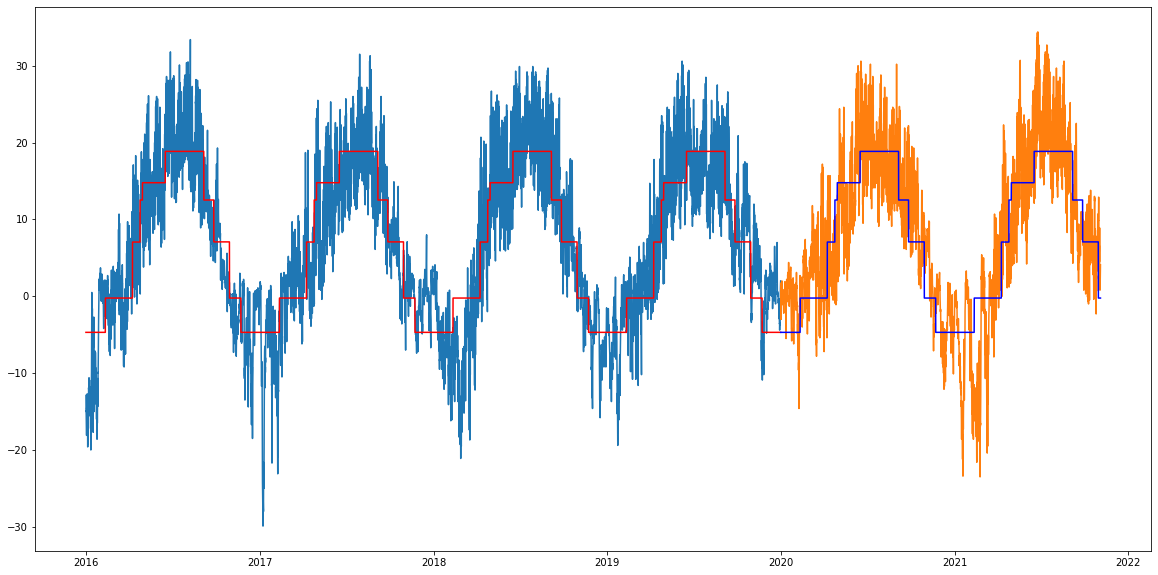

In [110]:
# DecisionTreeRegressor;cos,sin преобразования

X_train = data_train.loc[:,['sin_dayofyear','cos_dayofyear']]
X_test = data_test.loc[:,['sin_dayofyear','cos_dayofyear']]
y_train = data_train['T']
y_test = data_test['T']

cv  = TimeSeriesSplit()
params = {
    'splitter':['best','random'],
    'max_depth': [None] + [i for i in range(1,21)],
    'max_leaf_nodes': [None] + [i for i in range(10,110,10)],
    'ccp_alpha': [i for i in np.arange(0.0,1.1,0.1)]
}
model = DecisionTreeRegressor(random_state=1)
grid_s = GridSearchCV(model,param_grid=params,scoring='neg_mean_squared_error',cv=cv,verbose=True,n_jobs=2)

grid_s.fit(X_train,y_train)
print(grid_s.best_params_)
pred_train = grid_s.predict(X_train)
pred_test = grid_s.predict(X_test)

plt.figure(figsize=(20,10))
plt.plot(data_train['dates'],y_train)
plt.plot(data_test['dates'],y_test)
plt.plot(data_train['dates'],pred_train,color = 'red')
plt.plot(data_test['dates'],pred_test,color = 'blue')

print('Ошибка модели на обучающих данных: {}'.format(mean_squared_error(y_train,pred_train)))
print('Ошибка модели на тестовых данных: {}'.format(mean_squared_error(y_test,pred_test)))

Fitting 5 folds for each of 5082 candidates, totalling 25410 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 330 tasks      | elapsed:    3.2s
[Parallel(n_jobs=2)]: Done 2730 tasks      | elapsed:   16.7s
[Parallel(n_jobs=2)]: Done 6730 tasks      | elapsed:   39.9s
[Parallel(n_jobs=2)]: Done 12330 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done 19530 tasks      | elapsed:  1.9min
[Parallel(n_jobs=2)]: Done 25410 out of 25410 | elapsed:  2.4min finished


{'ccp_alpha': 0.6000000000000001, 'max_depth': 14, 'max_leaf_nodes': None, 'splitter': 'best'}
Ошибка модели на обучающих данных: 25.497548305255304
Ошибка модели на тестовых данных: 33.791979673532936


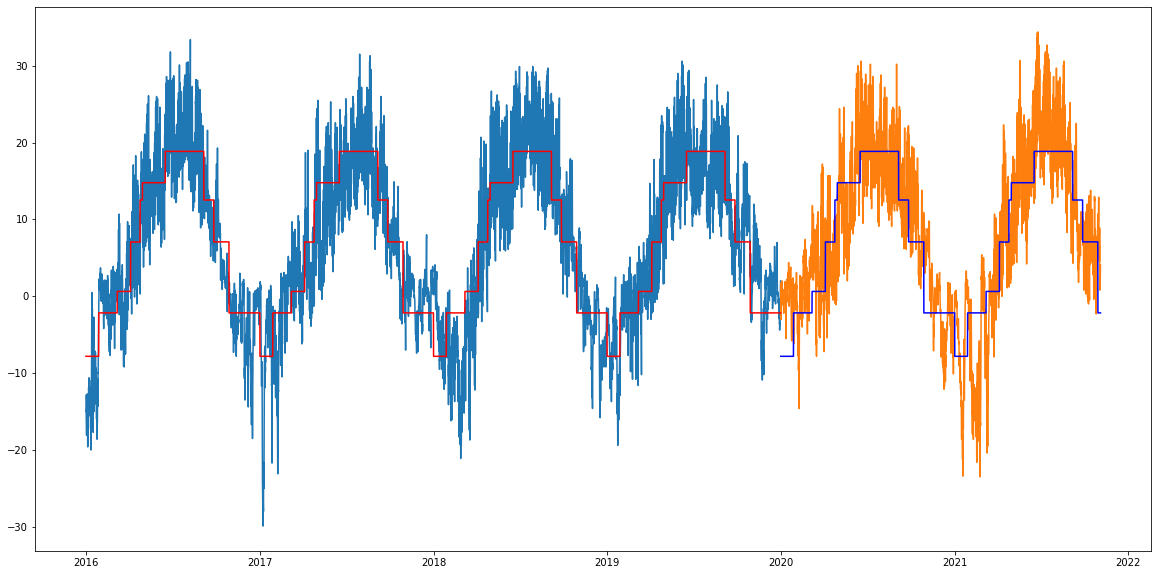

In [127]:
# Использование cos и dayofyear
X_train = data_train.loc[:,['dayofyear','cos_dayofyear']]
y_train = data_train['T']
X_test = data_test.loc[:,['dayofyear','cos_dayofyear']]
y_test = data_test['T']

cv  = TimeSeriesSplit()
params = {
    'splitter':['best','random'],
    'max_depth': [None] + [i for i in range(1,21)],
    'max_leaf_nodes': [None] + [i for i in range(10,110,10)],
    'ccp_alpha': [i for i in np.arange(0.0,1.1,0.1)]
}
model = DecisionTreeRegressor(random_state=1)
grid_s = GridSearchCV(model,param_grid=params,scoring='neg_mean_squared_error',cv=cv,verbose=True,n_jobs=2)

grid_s.fit(X_train,y_train)
print(grid_s.best_params_)
pred_train = grid_s.predict(X_train)
pred_test = grid_s.predict(X_test)

plt.figure(figsize=(20,10))
plt.plot(data_train['dates'],y_train)
plt.plot(data_test['dates'],y_test)
plt.plot(data_train['dates'],pred_train,color = 'red')
plt.plot(data_test['dates'],pred_test,color = 'blue')

print('Ошибка модели на обучающих данных: {}'.format(mean_squared_error(y_train,pred_train)))
print('Ошибка модели на тестовых данных: {}'.format(mean_squared_error(y_test,pred_test)))

In [302]:
# Прогнозирование температуры погоды для времени ее измерения(как в датасете-каждые 3 часа)
# Использование данных о температуре за предыдущие сутки в качестве признаков
# Для этого необходимо добавить новые признаки,однако времени на это не хватило

In [80]:
# Создание новых признаков
new_data = pd.DataFrame(data,index = [i for i in range(data.shape[0])])
prev_t = pd.DataFrame()
l = new_data.shape[0]
for i in range(1,9):
  a = new_data.loc[i:,'T']
  for k in range(i):
    a.loc[l+k] = np.nan
  a.index = [j for j in range(l)]
  prev_t[f't-{3*i}'] = a
prev_t

,t-3,t-6,t-9,t-12,t-15,t-18,t-21,t-24
0,3.4,2.8,2.2,1.9,2.5,2.5,2.4,0.8
1,2.8,2.2,1.9,2.5,2.5,2.4,0.8,1.4
2,2.2,1.9,2.5,2.5,2.4,0.8,1.4,2.5
3,1.9,2.5,2.5,2.4,0.8,1.4,2.5,2.8
4,2.5,2.5,2.4,0.8,1.4,2.5,2.8,1.8
...,...,...,...,...,...,...,...,...
17056,-15.0,-14.8,-14.6,-14.0,NaN,NaN,NaN,NaN
17057,-14.8,-14.6,-14.0,NaN,NaN,NaN,NaN,NaN
17058,-14.6,-14.0,NaN,NaN,NaN,NaN,NaN,NaN
17059,-14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
# Отбрасывание строк с nan признаками
res_data = new_data.join(prev_t)
for i in range(3,27,3):
  res_data = res_data[res_data[f't-{i}'].notna()]
res_data.shape

(17045, 40)

In [107]:
data_train = res_data[res_data.dates <'2020-01-01']
data_test = res_data[res_data.dates >='2020-01-01']

# Разбиение датасетов на признаки и целевые переменные
X_train = data_train.loc[:,'t-3':'t-24']
X_train['cos_dayofyear'] = data_train.loc[:,'cos_dayofyear']
X_test = data_test.loc[:,'t-3':'t-24']
X_test['cos_dayofyear'] = data_test.loc[:,'cos_dayofyear']

y_train = data_train['T']
y_test = data_test['T']

In [105]:
# Tree;cos; температура за 24 часа
cv  = TimeSeriesSplit()
params = {
    'splitter':['best','random'],
    'max_depth': [None] + [i for i in range(1,21)],
    'max_leaf_nodes': [None] + [i for i in range(10,210,10)],
    'ccp_alpha': [i for i in np.arange(0.0,1.1,0.1)]
}
model = DecisionTreeRegressor(random_state=1)
grid_s = GridSearchCV(model,param_grid=params,scoring='neg_mean_squared_error',cv=cv,verbose=True,n_jobs=2)

grid_s.fit(X_train,y_train)
print(grid_s.best_params_)


Fitting 5 folds for each of 9702 candidates, totalling 48510 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 202 tasks      | elapsed:    4.3s
[Parallel(n_jobs=2)]: Done 2458 tasks      | elapsed:   27.8s
[Parallel(n_jobs=2)]: Done 6458 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 12058 tasks      | elapsed:  2.6min
[Parallel(n_jobs=2)]: Done 19258 tasks      | elapsed:  4.3min
[Parallel(n_jobs=2)]: Done 28058 tasks      | elapsed:  6.3min
[Parallel(n_jobs=2)]: Done 38458 tasks      | elapsed:  8.7min


{'ccp_alpha': 0.0, 'max_depth': 14, 'max_leaf_nodes': 130, 'splitter': 'random'}


[Parallel(n_jobs=2)]: Done 48510 out of 48510 | elapsed: 11.2min finished


Ошибка модели на обучающих данных: 3.421957976213407
Ошибка модели на тестовых данных: 4.111417032665183


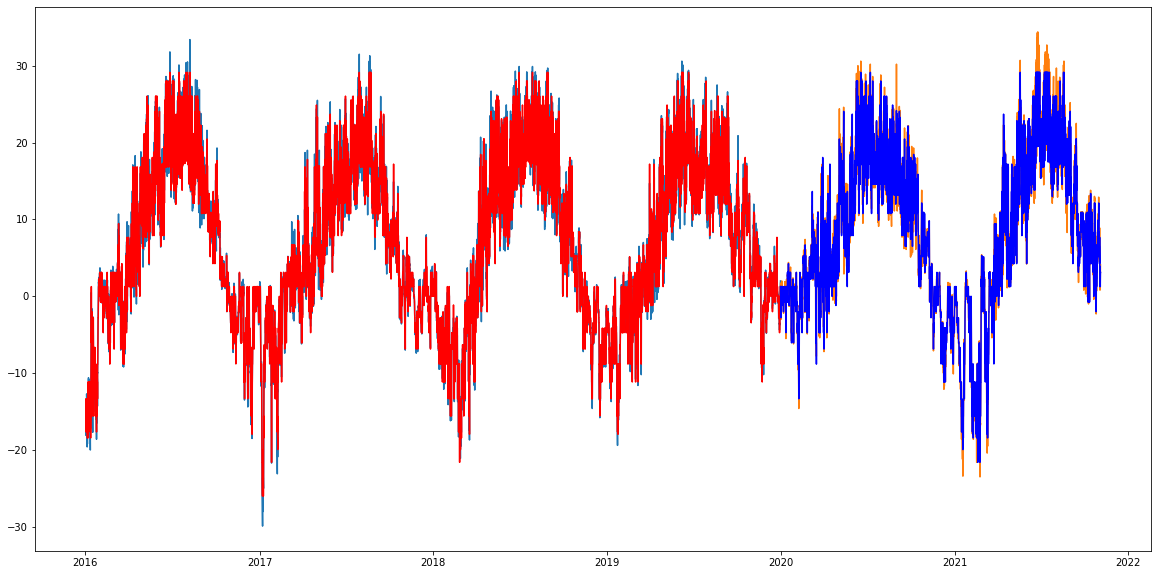

In [108]:
pred_train = grid_s.predict(X_train)
pred_test = grid_s.predict(X_test)

plt.figure(figsize=(20,10))
plt.plot(data_train['dates'],y_train)
plt.plot(data_test['dates'],y_test)
plt.plot(data_train['dates'],pred_train,color = 'red')
plt.plot(data_test['dates'],pred_test,color = 'blue')

print('Ошибка модели на обучающих данных: {}'.format(mean_squared_error(y_train,pred_train)))
print('Ошибка модели на тестовых данных: {}'.format(mean_squared_error(y_test,pred_test)))